### Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### loading the data

In [2]:
data = pd.read_csv(r"C:\Users\gaman\OneDrive - IIT Hyderabad\Desktop\epoch-2023-24-common-pool-hackathon\train.csv")
data

,ID,A,B,C,D,E,F,G,H,I,Target
0,1,6.750761,207.254505,23642.99260,7.691012,293.783040,446.696939,6.000391,30.900815,2.777726,1
1,2,6.037428,227.033994,12988.79123,8.476905,392.380529,306.386283,7.122391,41.190507,3.594217,1
2,3,7.638762,178.271636,18308.50267,6.548098,362.332872,394.180985,11.291788,81.989156,4.496627,0
3,4,6.090016,216.736232,12558.89797,9.297300,317.983236,409.427236,10.754842,30.965844,2.943522,0
4,5,8.390501,215.295518,27032.14226,6.553958,282.859453,443.445590,12.841611,46.368219,4.150359,1
...,...,...,...,...,...,...,...,...,...,...,...
2288,2289,NaN,273.255621,44506.44156,8.412688,233.792588,485.647232,14.705014,52.164236,4.124781,1
2289,2290,8.989900,215.047358,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843,1
2290,2291,NaN,193.926180,14936.50397,7.203401,309.447432,447.450108,12.180626,NaN,4.297914,0
2291,2292,6.380717,266.015410,21250.93563,4.854335,357.241027,358.185473,27.006707,59.937785,4.532020,0


### data preprocessing

In [3]:
data.groupby('Target').count()

,ID,A,B,C,D,E,F,G,H,I
Target,,,,,,,,,,
0,1411,1177,1411,1411,1411,1061,1411,1411,1334,1411
1,882,758,882,882,882,684,882,882,844,882


In [4]:
data = data.drop(['ID'],axis=1)
data

,A,B,C,D,E,F,G,H,I,Target
0,6.750761,207.254505,23642.99260,7.691012,293.783040,446.696939,6.000391,30.900815,2.777726,1
1,6.037428,227.033994,12988.79123,8.476905,392.380529,306.386283,7.122391,41.190507,3.594217,1
2,7.638762,178.271636,18308.50267,6.548098,362.332872,394.180985,11.291788,81.989156,4.496627,0
3,6.090016,216.736232,12558.89797,9.297300,317.983236,409.427236,10.754842,30.965844,2.943522,0
4,8.390501,215.295518,27032.14226,6.553958,282.859453,443.445590,12.841611,46.368219,4.150359,1
...,...,...,...,...,...,...,...,...,...,...
2288,NaN,273.255621,44506.44156,8.412688,233.792588,485.647232,14.705014,52.164236,4.124781,1
2289,8.989900,215.047358,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843,1
2290,NaN,193.926180,14936.50397,7.203401,309.447432,447.450108,12.180626,NaN,4.297914,0
2291,6.380717,266.015410,21250.93563,4.854335,357.241027,358.185473,27.006707,59.937785,4.532020,0


In [5]:
data.isnull().sum()

A         358
B           0
C           0
D           0
E         548
F           0
G           0
H         115
I           0
Target      0
dtype: int64

In [6]:
data['A'] = data['A'].fillna(data['A'].mean())
data['E'] = data['E'].fillna(data['E'].mean())
data['H'] = data['H'].fillna(data['H'].mean())

In [7]:
data.isnull().sum()

A         0
B         0
C         0
D         0
E         0
F         0
G         0
H         0
I         0
Target    0
dtype: int64

In [8]:
x_data = data.iloc[:,:-1]
x_data

,A,B,C,D,E,F,G,H,I
0,6.750761,207.254505,23642.99260,7.691012,293.783040,446.696939,6.000391,30.900815,2.777726
1,6.037428,227.033994,12988.79123,8.476905,392.380529,306.386283,7.122391,41.190507,3.594217
2,7.638762,178.271636,18308.50267,6.548098,362.332872,394.180985,11.291788,81.989156,4.496627
3,6.090016,216.736232,12558.89797,9.297300,317.983236,409.427236,10.754842,30.965844,2.943522
4,8.390501,215.295518,27032.14226,6.553958,282.859453,443.445590,12.841611,46.368219,4.150359
...,...,...,...,...,...,...,...,...,...
2288,7.070064,273.255621,44506.44156,8.412688,233.792588,485.647232,14.705014,52.164236,4.124781
2289,8.989900,215.047358,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843
2290,7.070064,193.926180,14936.50397,7.203401,309.447432,447.450108,12.180626,66.534137,4.297914
2291,6.380717,266.015410,21250.93563,4.854335,357.241027,358.185473,27.006707,59.937785,4.532020


In [9]:
y_data = data.iloc[:,-1]
y_data

0       1
1       1
2       0
3       0
4       1
       ..
2288    1
2289    1
2290    0
2291    0
2292    0
Name: Target, Length: 2293, dtype: int64

In [10]:
for col in x_data :
    x_data[col] = (x_data[col] - x_data[col].mean()) / x_data[col].std()
x_data

,A,B,C,D,E,F,G,H,I
0,-2.188914e-01,0.319528,0.185564,0.375341,-1.094213e+00,0.259697,-2.488444,-2.228720e+00,-1.524729
1,-7.079016e-01,0.923612,-1.019996,0.873051,1.632768e+00,-1.478199,-2.152077,-1.585141e+00,-0.477501
2,3.898583e-01,-0.565636,-0.418052,-0.348472,8.017189e-01,-0.390769,-0.902123,9.666489e-01,0.679925
3,-6.718511e-01,0.609108,-1.068640,1.392610,-4.248906e-01,-0.201928,-1.063095,-2.224653e+00,-1.312081
4,9.051967e-01,0.565108,0.569058,-0.344761,-1.396334e+00,0.219426,-0.437497,-1.261297e+00,0.235804
...,...,...,...,...,...,...,...,...,...
2288,5.479845e-15,2.335263,2.546336,0.832382,-2.753411e+00,0.742138,0.121137,-8.987792e-01,0.202997
2289,1.316102e+00,0.557529,-0.688160,-0.507296,-5.646233e-01,-0.437473,-1.319635,-7.170789e-01,0.830266
2290,5.479845e-15,-0.087532,-0.799606,0.066535,-6.609714e-01,0.269026,-0.635656,9.777146e-15,0.425057
2291,-4.725671e-01,2.114140,-0.085106,-1.421140,6.608901e-01,-0.836611,3.809092,-4.125751e-01,0.725320


### splitting the data into train and validation

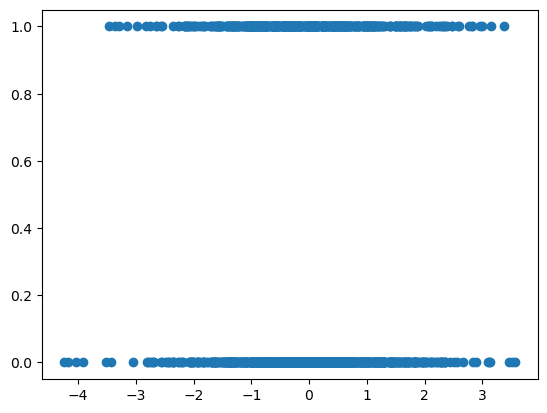

In [11]:
x_train,x_val = np.split(x_data.sample(frac = 1),[int(0.8*len(data))])
y_train,y_val = np.split(y_data.sample(frac = 1),[int(0.8*len(data))])
y_train
plt.scatter(x_train['E'],y_train)

In [12]:
x_train=x_train.reset_index()
x_train

x_train=x_train.drop(['index'],axis=1)
x_train

,A,B,C,D,E,F,G,H,I
0,0.165929,0.092257,-0.844388,1.095029,-1.582779,0.758691,0.890597,2.252574e-01,1.484427
1,-1.177394,-1.413954,0.655461,-1.035000,3.114056,-0.040968,0.552687,7.405883e-01,1.042336
2,0.648315,-0.511007,-1.116524,-0.531321,-0.643789,2.984551,1.007064,3.421994e-03,-1.008030
3,-0.649107,-0.472768,-0.777131,-0.807020,-1.092618,-0.422609,-0.812183,-2.869267e-01,1.912762
4,3.548888,0.628404,-1.209036,0.865613,1.176810,-0.967066,-1.360590,4.564771e-01,-0.555706
...,...,...,...,...,...,...,...,...,...
1829,0.547108,0.068526,-0.177533,-0.561962,0.126407,1.531969,0.659733,9.777146e-15,0.448124
1830,0.183751,-0.242436,0.909739,0.233868,-0.656349,0.492591,-0.973382,-1.210295e+00,-0.295164
1831,-0.970671,-0.764766,-0.630475,0.117233,1.508975,-0.082154,-0.745312,1.236790e+00,-0.641613
1832,0.240330,0.486925,-0.400489,-0.234590,0.625778,1.212256,-0.663821,-1.348118e+00,1.869072


In [13]:
x_val=x_val.reset_index()
x_val

x_val=x_val.drop(['index'],axis=1)
x_val

,A,B,C,D,E,F,G,H,I
0,-2.659625e-01,0.962374,-1.617842,-0.728928,8.350219e-01,-2.122199,-0.347911,-1.094669e-01,-0.662692
1,2.244070e-01,-2.267701,-1.487736,-0.132774,-2.537268e+00,0.794213,-0.280318,9.777146e-15,-1.048333
2,-7.912765e-01,-0.032012,-1.083021,-0.276580,1.310412e+00,-0.716856,2.098458,1.492394e+00,0.701183
3,-1.272379e+00,-0.126543,1.378350,-0.832786,-1.393280e+00,-0.561109,0.469717,8.734142e-01,0.624644
4,-4.229708e-01,-0.543445,0.127456,-0.471073,-1.795681e-01,-0.666956,-0.336560,-1.564166e+00,-0.674198
...,...,...,...,...,...,...,...,...,...
454,7.109119e-01,0.495894,0.286143,-0.545351,-3.111118e-01,1.136544,0.015315,-4.174224e-01,-1.535711
455,5.126635e-01,0.742068,-0.934752,-0.458895,-1.262498e+00,0.431891,-0.478504,1.522757e-02,0.841585
456,5.479845e-15,0.628456,-0.454734,0.947311,7.860795e-14,-0.204485,-1.225302,-3.010595e+00,-0.463474
457,-2.244708e-01,0.379474,-0.737094,0.224203,4.897225e-01,-0.209033,-0.113820,2.296126e-01,1.280239


In [14]:
y_train=y_train.reset_index()
y_train

y_train=y_train.drop(['index'],axis=1)
y_train

,Target
0,1
1,0
2,1
3,1
4,0
...,...
1829,1
1830,1
1831,0
1832,0


In [15]:
y_val=y_val.reset_index()
y_val

y_val=y_val.drop(['index'],axis=1)
y_val

,Target
0,0
1,0
2,0
3,1
4,0
...,...
454,0
455,0
456,0
457,0


In [16]:
w = np.zeros(9)
b = 0
alp = 1
eps = 0.5

### sigmoid function

In [17]:
def sigmoid(w,x,b) :
    ans = 0
    for i in range(len(x)) :
        ans = ans + (w[i]*x[i])
    return 1/(1+np.exp(-ans))

### loss function

In [18]:
def loss(x,y,w,b) :
    f = sigmoid(w,x,b)
    ans1 = y*(np.log(f))
    ans2 = (1-y)*(np.log(1-f))
    return -(ans1+ans2)   

### cost function

In [19]:
def cost(x_data,y_data,w,b) :
    ans = 0
    for i in range(len(x_data)) :
        arr = np.array(x_data.loc[i])
        ans = ans + loss(arr,y_data.loc[i],w,b)
    return ans/len(x_data)

### gradient descent

In [20]:
def grad_w(x_data,y_data,j,w,b) :
    ans = 0
    for i in range(len(x_data)) :
        arr = np.array(x_data.loc[i])
        ans = ans + (sigmoid(w,arr,b) - y_data.loc[i])*arr[j]
    return ans/len(x_data)

In [21]:
def grad_b(x_data,y_data,w,b) :
    ans = 0
    for i in range(len(x_data)) :
        arr = np.array(x_data.loc[i])
        ans = ans + (sigmoid(w,arr,b) - y_data.loc[i])
    return ans/len(x_data)

In [22]:
def grad_descent(x_data,y_data,w,b,eps,alp) :
    #print('gaman')
    k = 100
    while (k) :
        for j in range(len(x_data.loc[0])) :
            w[j] = w[j] - alp*grad_w(x_data,y_data,j,w,b)
        b = b - alp*grad_b(x_data,y_data,w,b)
        k = k-1
    return b

### training the model

In [23]:
b = grad_descent(x_train,y_train,w,b,eps,alp)
w

Target    0.693147
dtype: float64
85
Target    0.692133
dtype: float64
86
Target    0.691593
dtype: float64
87
Target    0.691305
dtype: float64
88
Target    0.691151
dtype: float64
89
Target    0.691068
dtype: float64
90
Target    0.691024
dtype: float64
91
Target    0.691
dtype: float64
92
Target    0.690987
dtype: float64
93
Target    0.69098
dtype: float64
94
Target    0.690976
dtype: float64
95
Target    0.690974
dtype: float64
96
Target    0.690973
dtype: float64
97
Target    0.690972
dtype: float64
98
Target    0.690972
dtype: float64
99


array([ 0.0568408 ,  0.09036219, -0.01248547,  0.00650036, -0.04260484,
        0.00113251,  0.03043122,  0.03650816, -0.01034356])

In [24]:
b

Target   -1.725705
dtype: float64

### predicting the labels for validation data

In [26]:
val_df = pd.DataFrame(index=range(len(x_val)), columns=range(1))

val_df.columns = ['Target']
for i in range(len(x_val)):
    arr=np.array(x_val.loc[i])
    ans=sigmoid(w,arr,b)
    if(ans>=0.5):
        val_df['Target'][i]=1
    else:
        val_df['Target'][i]=0
        
val_df

,Target
0,1
1,0
2,1
3,0
4,0
...,...
454,1
455,1
456,0
457,1


### check accuracy for val data

In [27]:
from sklearn.metrics import accuracy_score

arr1 = np.array(y_val)
arr2 = np.array(val_df)

arr1 = arr1.flatten()
arr2 = arr2.flatten()
arr2 = arr2.astype(int)
#arr1
arr2
accuracy_score(arr1,arr2)

0.46405228758169936

### predicting the labels for test data

In [28]:
test_data = pd.read_csv(r"C:\Users\gaman\OneDrive - IIT Hyderabad\Desktop\epoch-2023-24-common-pool-hackathon\test.csv")

In [29]:
test_data = test_data.drop(['ID'],axis=1)
test_data

,A,B,C,D,E,F,G,H,I
0,9.652563,205.206059,8508.15373,4.945417,386.541185,392.767453,12.446539,53.898037,3.192570
1,8.509220,200.304348,10587.30493,6.392545,307.398959,585.222628,11.798991,63.827569,2.519892
2,NaN,214.972435,36112.13463,7.094066,NaN,414.101567,15.874564,71.631818,2.432507
3,6.816417,237.269505,24170.27489,8.706012,349.772176,477.023965,16.574060,92.945757,4.274738
4,NaN,232.468727,15873.03443,6.365469,313.263607,365.626487,10.392937,59.659209,4.706775
...,...,...,...,...,...,...,...,...,...
978,NaN,237.677383,26009.07526,7.074531,372.600296,344.767924,14.442238,72.696240,3.706602
979,6.775583,218.414929,17968.88278,8.254115,NaN,358.717677,10.520161,57.244111,4.333636
980,7.283914,197.602125,23112.50444,9.502809,332.331984,449.361679,14.458591,70.000219,3.571863
981,7.397544,184.840925,19797.10854,8.422000,387.190304,428.414784,13.143444,62.337976,3.947138


In [30]:
test_data.isnull().sum()

A    133
B      0
C      0
D      0
E    233
F      0
G      0
H     47
I      0
dtype: int64

In [31]:
test_data['A'] = test_data['A'].fillna(test_data['A'].mean())
test_data['E'] = test_data['E'].fillna(test_data['E'].mean())
test_data['H'] = test_data['H'].fillna(test_data['H'].mean())

In [32]:
test_data.isnull().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
dtype: int64

In [33]:
for col in test_data :
    test_data[col] = (test_data[col] - test_data[col].mean()) / test_data[col].std()
test_data

,A,B,C,D,E,F,G,H,I
0,1.702404e+00,0.295930,-1.571639,-1.402501,1.433372e+00,-0.426178,-0.555139,-0.798433,-0.990311
1,9.383011e-01,0.148255,-1.330156,-0.493465,-7.580851e-01,1.948066,-0.754721,-0.147391,-1.850029
2,-5.342176e-15,0.590164,1.634433,-0.052793,-1.888801e-14,-0.162987,0.501415,0.364304,-1.961710
3,-1.930098e-01,1.261913,0.247442,0.959777,4.152341e-01,0.613262,0.717007,1.761778,0.392756
4,-5.342176e-15,1.117279,-0.716243,-0.510473,-5.956923e-01,-0.761005,-1.188082,-0.420694,0.944921
...,...,...,...,...,...,...,...,...,...
978,-5.342176e-15,1.274201,0.461010,-0.065064,1.047347e+00,-1.018329,0.059957,0.434094,-0.333352
979,-2.202995e-01,0.693877,-0.472820,0.675910,-1.888801e-14,-0.846236,-1.148870,-0.579043,0.468031
980,1.194212e-01,0.066844,0.124587,1.460297,-6.768676e-02,0.272003,0.064997,0.257326,-0.505556
981,1.953611e-01,-0.317616,-0.260480,0.781370,1.451346e+00,0.013589,-0.340346,-0.245058,-0.025934


In [34]:
df = pd.DataFrame(index=range(983), columns=range(2))
df

,0,1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
978,NaN,NaN
979,NaN,NaN
980,NaN,NaN
981,NaN,NaN


In [35]:
df.columns = ['ID','Target']
for i in range(len(test_data)):
    df['ID'][i]=i+2294
    arr=np.array(test_data.loc[i])
    ans=sigmoid(w,arr,b)
    if(ans>=0.5):
        df['Target'][i]=1
    else:
        df['Target'][i]=0

In [36]:
display(df)

,ID,Target
0,2294,1
1,2295,1
2,2296,1
3,2297,1
4,2298,1
...,...,...
978,3272,1
979,3273,0
980,3274,1
981,3275,0


In [37]:
df.to_csv('test_results.csv',index = False)